In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import contextily
import sklearn.cluster
import numpy as np

def make_geo(df_accidents: pd.DataFrame, df_locations: pd.DataFrame) -> geopandas.GeoDataFrame:

    # Sort out only accidents in South Moravian Region
    df_accidents = df_accidents[df_accidents['p4a'] == 6]

    # Merge the two dataframes based on accident ID
    newDf = pd.merge(df_accidents, df_locations, on='p1')

    # Filter out rows with missing coordinates
    newDf = newDf[newDf['d'].notna() & newDf['e'].notna()]

    # Copy the dataframe to avoid SettingWithCopyWarning
    filteredDf = newDf.copy()

    # Swap columns if d is smaller than e (x < y)
    filteredDf[['d', 'e']] = filteredDf[['d', 'e']].where(filteredDf['d'] >= filteredDf['e'], filteredDf[['e', 'd']].values)

    # Create a GeoDataFrame from points in previous dataframe using Krovak projection
    geoDf = geopandas.GeoDataFrame(filteredDf, geometry=geopandas.points_from_xy(filteredDf.d, filteredDf.e), crs='EPSG:5514')

    print(geoDf.geometry)

    geoDf = geoDf.to_crs("EPSG:4326")

    world = geopandas.read_file('ne_110m_admin_0_countries.shp')

    czechia = world[world['ADMIN'] == 'Czechia']

    # Plot Czechia map
    ax = czechia.plot(color='lightgrey', edgecolor='black', figsize=(10, 8))

    # Ensure CRS matches
    geoDf = geoDf.to_crs("EPSG:4326")

    # Plot the points on the map
    geoDf.plot(ax=ax, color='red', markersize=3)

    # Add titles and labels
    plt.title("Points on Czechia Map")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Show the map
    plt.savefig('map.png')

    return geoDf

                 p1        d        e                  h    i   j  \
0       10623000002  -715794 -1017664  Kropáčova Vrutice  NaN NaN   
1      161723000001 -1132534  -691598        NOVÁ BUKOVÁ  NaN NaN   
2      161723000002 -1107780  -693884           SENOŽATY  NaN NaN   
3      161723000003 -1104484  -701671             CHYŠNÁ  NaN NaN   
4      161723000004 -1113553  -694154              ŽELIV  NaN NaN   
...             ...      ...      ...                ...  ...  ..   
69696  140824000885 -1139158  -535163             Přerov  NaN NaN   
69697  140524001860 -1120527  -547595            OLOMOUC  NaN NaN   
69698  140524001859 -1123234  -547894            Olomouc  NaN NaN   
69699  140524001858 -1127033  -540835        VELKÝ TÝNEC  NaN NaN   
69700   11624000662 -1042339  -752631          HOSTIVICE  NaN NaN   

                       k  
0        silnice 1.třídy  
1        silnice 2.třídy  
2        silnice 2.třídy  
3      komunikace místní  
4        silnice 3.třídy  
...      

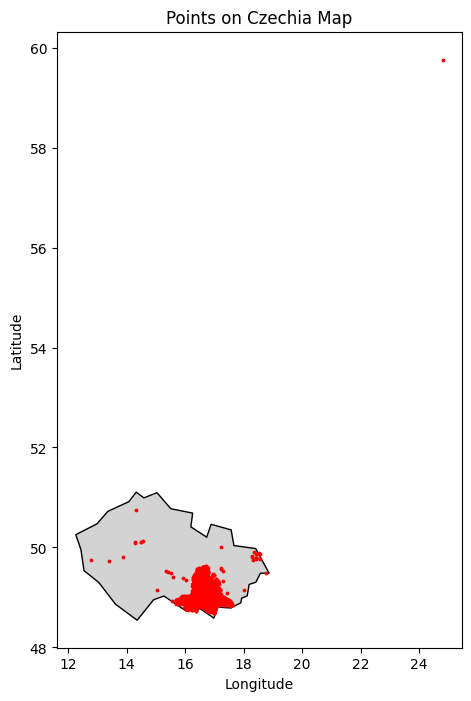

In [137]:
df_accidents = pd.read_pickle("accidents.pkl.gz")
df_locations = pd.read_pickle("locations.pkl.gz")
gdf = make_geo(df_accidents, df_locations)